# W14 - Exercise Heart Disease Analysis

You are tasked with analyzing data about heart disease condition. You are to create EDA and modeling about the data.Use the dataset __hearth__ for this exercise

About this dataset: <br>
- __Age:__ Age of the patient
- __Sex:__ Sex of the patient
- __exang:__ exercise induced angina (1 = yes; 0 = no)
- __ca:__ number of major vessels (0-3)
- __cp:__ Chest Pain type chest pain type
- __Value 1:__ typical angina
- __Value 2:__ atypical angina
- __Value 3:__ non-anginal pain
- __Value 4:__ asymptomatic
- __trtbps:__ resting blood pressure (in mm Hg)
- __chol:__ cholestoral in mg/dl fetched via BMI sensor
- __fbs:__ (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- __rest_ecg:__ resting electrocardiographic results
- __Value 0:__ normal
- __Value 1:__ having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- __Value 2:__ showing probable or definite left ventricular hypertrophy by Estes' criteria
- __thalach:__ maximum heart rate achieved
- __target:__ 0= less chance of heart attack 1= more chance of heart attack

Task:
1. Data Preparation / Cleaning
2. EDA
3. Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)
4. Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest
5. Create short conclusion about the modeling results

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.naive_bayes import GaussianNB

## Load Data 

In [87]:
df = pd.read_csv("C:/Users/Asuspc/OneDrive/Documents/Data Mining 2023_2024/W14_heart.csv", sep=',')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **1. Data Preparation/Cleaning**

In [88]:
# Check of missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Tidak ada missing value, maka lanjut ke step berikutnya

In [89]:
# Check of duplicate data

duplicatecheck = df.duplicated().sum()
print("The total of the duplicate data is", duplicatecheck)

duplicatedata = df[df.duplicated()]
print("\nThe duplicate data is:")
duplicatedata

The total of the duplicate data is 1

The duplicate data is:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [90]:
# Drop duplicate data

df = df.drop_duplicates()

duplicatecheck = df.duplicated().sum()
print("The total of the duplicate data is", duplicatecheck)

The total of the duplicate data is 0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### **2. Visualization (EDA) Compare two different variables and provide short analysis**

In [92]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


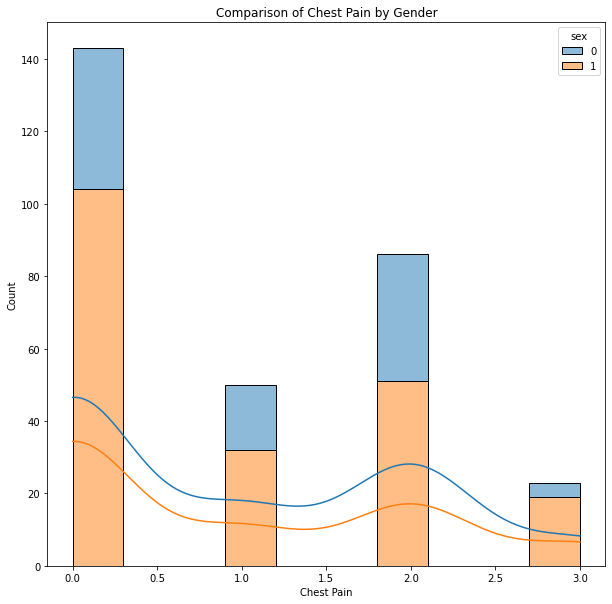

In [93]:
# Comparison of Chest Pain by Gender

plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='cp', hue='sex', multiple="stack", bins=10, kde=True)

plt.title('Comparison of Chest Pain by Gender')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.show()

**Analysis**

Kita bisa mendapatkan 2 hasil analisa berdasarkan grafik tersebut. 
1. Kita asumsikan bahwa __angka 0 menunjukkan gender laki-laki__ sedangkan __angka 1 menunjukkan gender perempuan__, maka dapat kita ketahui bahwa laki-laki lebih banyak memiliki chest pain daripada perempuan.
2. Chest pain terbagi menjadi beberapa kriteria yaikni: <br>
a. Value 1: typical angina <br>
b. Value 2: atypical angina <br>
c. Value 3: non-anginal pain <br>
d. Value 4: asymptomatic <br>
Melalui grafik tersebut dapat kita ketahui bahwa: <br>
- Orang yang memiliki chest pain dengan value 1 (0.0 pada grafik) yaitu "Typical Angina" adalah yang tertinggi
- Orang yang memiliki chest pain dengan value 4 (3.0 pada grafik) yaitu "Asymptomatic" adalah yang terendah
- Hampir 50% orang yang memiliki chest pain dengan value 5 (2.0 pada grafik) yaitu "Non-Anginal Pain"
 

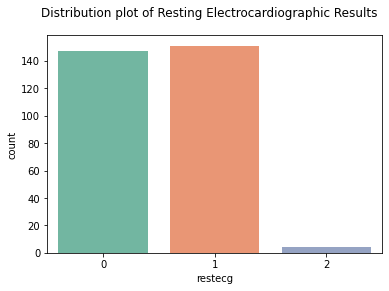

In [94]:
# Distribution plot of column Resting Electrocardiographic Results
sns.countplot(x='restecg', data=df, palette='Set2')

plt.suptitle('Distribution plot of Resting Electrocardiographic Results')
plt.show()

**Analysis**

Berdasarkan grafik tersebut, kita bisa mendapatkan hasil analisa resting electrocardiographic results yaitu: 
1. Orang yang having ST-T wave abnormality adalah yang tertinggi 
2. Orang yang showing probable or definite left ventricular hypertrophy by Estes' criteria adalah yang terendah
3. Namun, tidak menutup kemungkinan juga untuk orang yang normal karena memiliki nilai yang cukup tinggi dan hampir melampaui orang yang having ST-T wave abnormality

Keterangan grafik: <br>
a.Value 0: normal <br>
b. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
c. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>

##### **2. Machine Learning Techniques (Logistic Regression)**

In [95]:
# train and split data

X = df.drop(columns=["output"])  # Variabel independen (semua kolom kecuali Test results)
y = df["output"]  # Variabel dependen (Test results)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (271, 13) (271,)
Test set: (31, 13) (31,)


In [97]:
# Do scalling feature on Variable X_train and X_test 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

accuracy = model.score(X_test_scaled, y_test)
print(f"Logistic Regression model accuracy: {accuracy:.4f}")

Logistic Regression model accuracy: 0.9032


In [99]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [100]:
# test the model with the test dataset
y_pred_test = model.predict(X_test_scaled)
print(y_pred_test)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0]


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusionmatrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Confusion Matrix")
print(confusionmatrix)

print(f"Accuracy Score: {accuracy:.4f}")

Confusion Matrix
[[16  1]
 [ 2 12]]
Accuracy Score: 0.9032


##### **3. Model Algorithm (K-NN)**

In [102]:
knn_classifier =  KNeighborsClassifier(metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [103]:
y_pred_test2 = knn_classifier.predict(X_test_scaled)
print(y_pred_test2)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]


In [104]:
confusionmatrix3 = confusion_matrix(y_test, y_pred_test2)
accuracy3 = accuracy_score(y_test, y_pred_test2)

print("Confusion Matrix")
print(confusionmatrix3)

print(f"Accuracy Score: {accuracy3:.4f}")

Confusion Matrix
[[17  0]
 [ 3 11]]
Accuracy Score: 0.9032


##### **3. Model Algorithm (Naive Bayes)**

In [105]:
from sklearn.naive_bayes import GaussianNB

model_persamaan = GaussianNB()
model_persamaan.fit(X_train_scaled, y_train)

GaussianNB()

In [106]:
y_pred_test2 = model_persamaan.predict(X_test_scaled)
print(y_pred_test2)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]


In [107]:
confusionmatrix2 = confusion_matrix(y_test, y_pred_test2)
accuracy2 = accuracy_score(y_test, y_pred_test2)

print("Confusion Matrix")
print(confusionmatrix2)

print(f"Accuracy Score: {accuracy2:.4f}")

Confusion Matrix
[[17  0]
 [ 2 12]]
Accuracy Score: 0.9355


**Conclusion**

Dari tiga  model diatas dapat kita lihat bahwa Logistic Regression dan K-NN memiliki tingkat akurasi yang sama yaitu 0.9032. Sedangkan Naive Bayes memiliki tingkat akurasi yang paling tinggi diantara ketiganya yaitu dengan nilai akurasi 0.9355.